# **Book Reccomandation Model**

In [1]:
import numpy as np
import pandas as pd
import warnings
warnings.filterwarnings("ignore")

df=pd.read_csv('books.csv',error_bad_lines = False)
df.head(10)

b'Skipping line 3350: expected 12 fields, saw 13\nSkipping line 4704: expected 12 fields, saw 13\nSkipping line 5879: expected 12 fields, saw 13\nSkipping line 8981: expected 12 fields, saw 13\n'


,bookID,title,authors,average_rating,isbn,isbn13,language_code,num_pages,ratings_count,text_reviews_count,publication_date,publisher
0,1,Harry Potter and the Half-Blood Prince (Harry ...,J.K. Rowling/Mary GrandPré,4.57,0439785960,9780439785969,eng,652,2095690,27591,9/16/2006,Scholastic Inc.
1,2,Harry Potter and the Order of the Phoenix (Har...,J.K. Rowling/Mary GrandPré,4.49,0439358078,9780439358071,eng,870,2153167,29221,9/1/2004,Scholastic Inc.
2,4,Harry Potter and the Chamber of Secrets (Harry...,J.K. Rowling,4.42,0439554896,9780439554893,eng,352,6333,244,11/1/2003,Scholastic
3,5,Harry Potter and the Prisoner of Azkaban (Harr...,J.K. Rowling/Mary GrandPré,4.56,043965548X,9780439655484,eng,435,2339585,36325,5/1/2004,Scholastic Inc.
4,8,Harry Potter Boxed Set Books 1-5 (Harry Potte...,J.K. Rowling/Mary GrandPré,4.78,0439682584,9780439682589,eng,2690,41428,164,9/13/2004,Scholastic
5,9,"Unauthorized Harry Potter Book Seven News: ""Ha...",W. Frederick Zimmerman,3.74,0976540606,9780976540601,en-US,152,19,1,4/26/2005,Nimble Books
6,10,Harry Potter Collection (Harry Potter #1-6),J.K. Rowling,4.73,0439827604,9780439827607,eng,3342,28242,808,9/12/2005,Scholastic
7,12,The Ultimate Hitchhiker's Guide: Five Complete...,Douglas Adams,4.38,0517226952,9780517226957,eng,815,3628,254,11/1/2005,Gramercy Books
8,13,The Ultimate Hitchhiker's Guide to the Galaxy ...,Douglas Adams,4.38,0345453743,9780345453747,eng,815,249558,4080,4/30/2002,Del Rey Books
9,14,The Hitchhiker's Guide to the Galaxy (Hitchhik...,Douglas Adams,4.22,1400052920,9781400052929,eng,215,4930,460,8/3/2004,Crown


**Get the dataset size**

In [2]:
df.shape


(11123, 12)

In [3]:
df.dropna(0, inplace=True)

The data is of size (11123,12) where there are 12 columns with different features and 11123 records.

From the table above :

1. **bookID** : Unique ID for each book/series
2. **title**: Titles of the books
3. **authors** : Author of the particular book
4. **average_rating** : Average rating of the books
5. **ISBN**: ISBN(10) number- tells the information about a book - such as edition and publisher
6. **ISBN 13** :The new format for ISBN, implemented in 2007. 13 digits
language_code tells the language for the books
7. **Num_pages** :Contains the number of pages for the book
8. **Ratings_count** : The number of ratings given for the book
9. **text_reviews_count** :Has the count of reviews left by users
10. **publication_date** :Date of Publication
11. **publisher** : Publisher name

# Exploratory Data Ananlysis

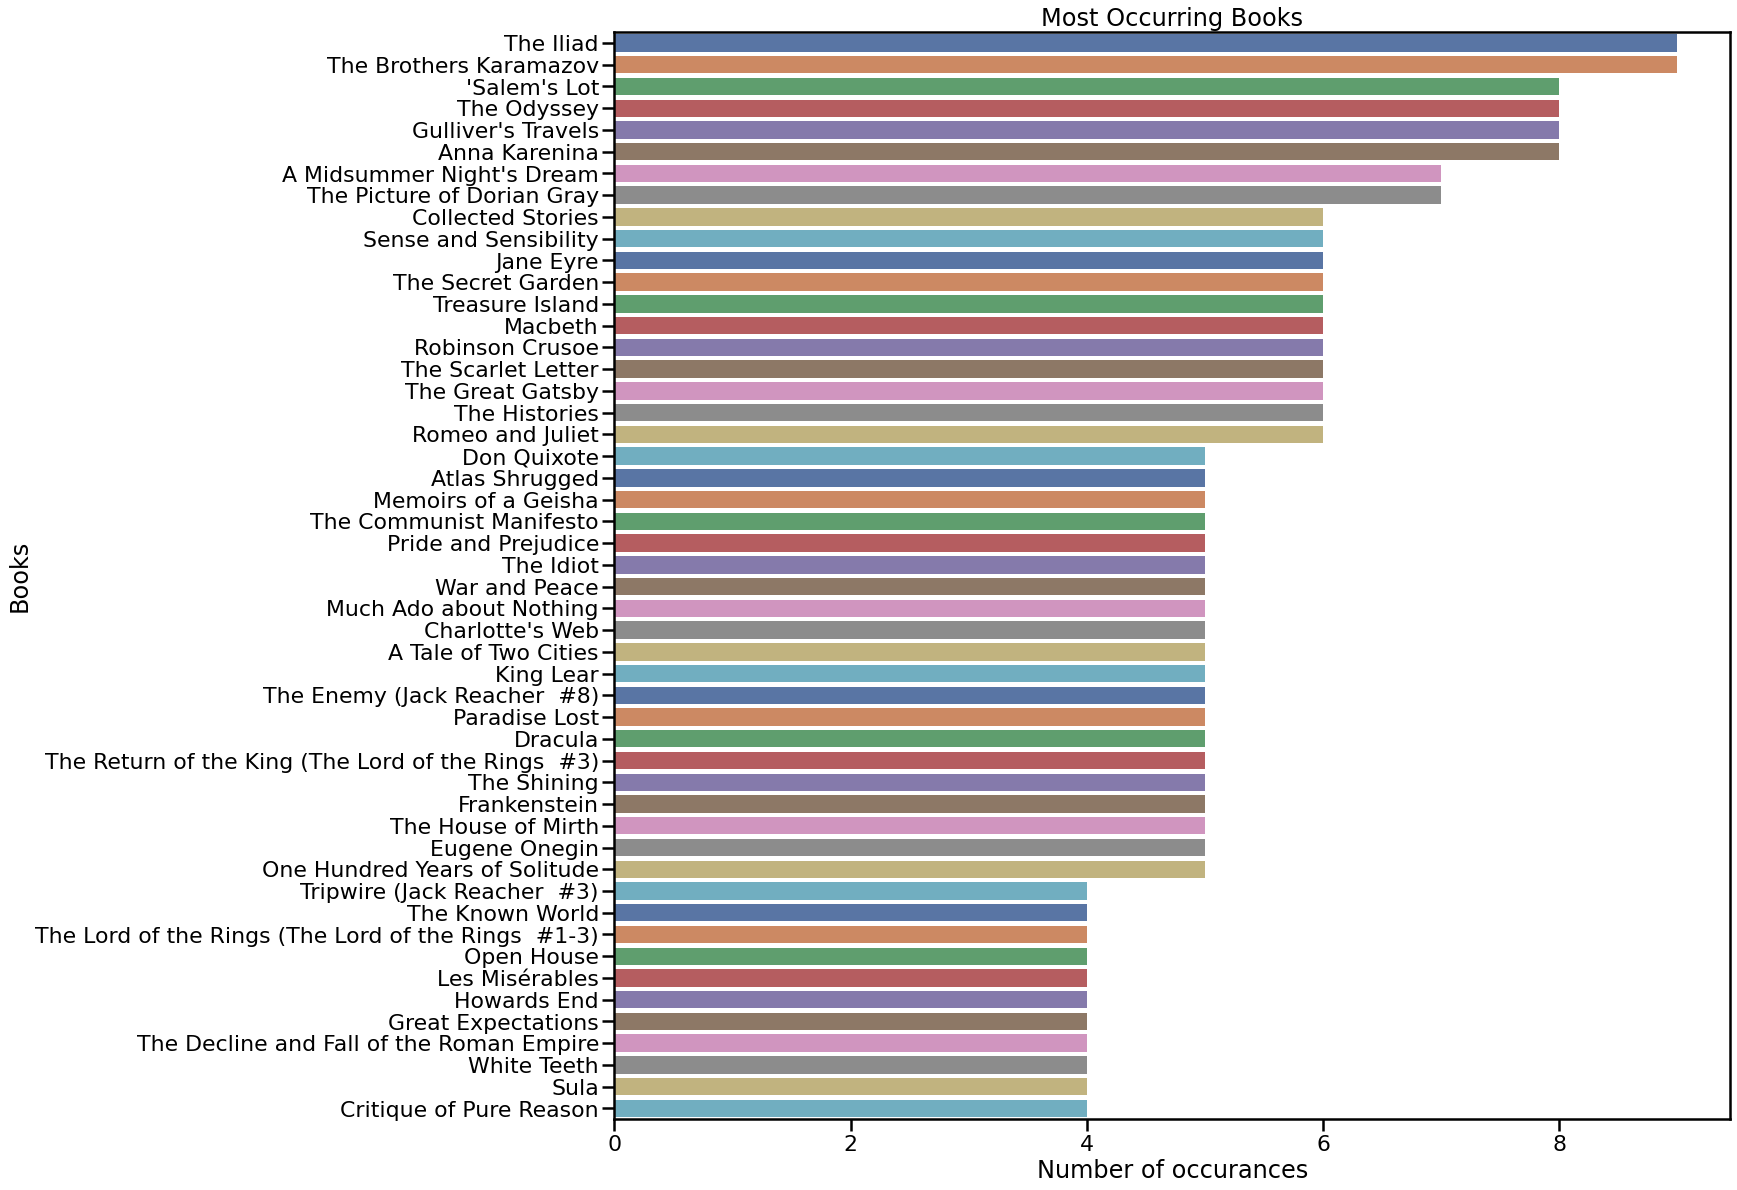

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns

# There are many books that have appeared many times in data file with various publication editions
sns.set_context('poster')
plt.figure(figsize=(20,20))

#Taking first 50 books
books = df['title'].value_counts()[:50]
rating = df.average_rating[:50]
sns.barplot(x = books, y = books.index, palette='deep')
plt.title("Most Occurring Books")
plt.xlabel("Number of occurances")
plt.ylabel("Books")
plt.show()

The books - 'The brothers karamazov' and 'The lliad' have most occurrence in the dataset

#### **The most rated Books**

In [5]:
most_rating = df.sort_values('ratings_count',ascending=False).head(20).set_index('title')
# Take the 20 most rated books
most_rating

,bookID,authors,average_rating,isbn,isbn13,language_code,num_pages,ratings_count,text_reviews_count,publication_date,publisher
title,,,,,,,,,,,
Twilight (Twilight #1),41865,Stephenie Meyer,3.59,0316015849,9780316015844,eng,501,4597666,94265,9/6/2006,Little Brown and Company
The Hobbit or There and Back Again,5907,J.R.R. Tolkien,4.27,0618260307,9780618260300,eng,366,2530894,32871,8/15/2002,Houghton Mifflin
The Catcher in the Rye,5107,J.D. Salinger,3.80,0316769177,9780316769174,eng,277,2457092,43499,1/30/2001,Back Bay Books
Angels & Demons (Robert Langdon #1),960,Dan Brown,3.89,1416524797,9781416524793,eng,736,2418736,21303,4/1/2006,Pocket Books
Harry Potter and the Prisoner of Azkaban (Harry Potter #3),5,J.K. Rowling/Mary GrandPré,4.56,043965548X,9780439655484,eng,435,2339585,36325,5/1/2004,Scholastic Inc.
Harry Potter and the Chamber of Secrets (Harry Potter #2),15881,J.K. Rowling/Mary GrandPré,4.42,0439064864,9780439064866,eng,341,2293963,34692,6/2/1999,Arthur A. Levine Books / Scholastic Inc.
Harry Potter and the Order of the Phoenix (Harry Potter #5),2,J.K. Rowling/Mary GrandPré,4.49,0439358078,9780439358071,eng,870,2153167,29221,9/1/2004,Scholastic Inc.
The Fellowship of the Ring (The Lord of the Rings #1),34,J.R.R. Tolkien,4.36,0618346252,9780618346257,eng,398,2128944,13670,9/5/2003,Houghton Mifflin Harcourt
Animal Farm,7613,George Orwell/Boris Grabnar/Peter Škerl,3.93,0452284244,9780452284241,eng,122,2111750,29677,5/6/2003,NAL


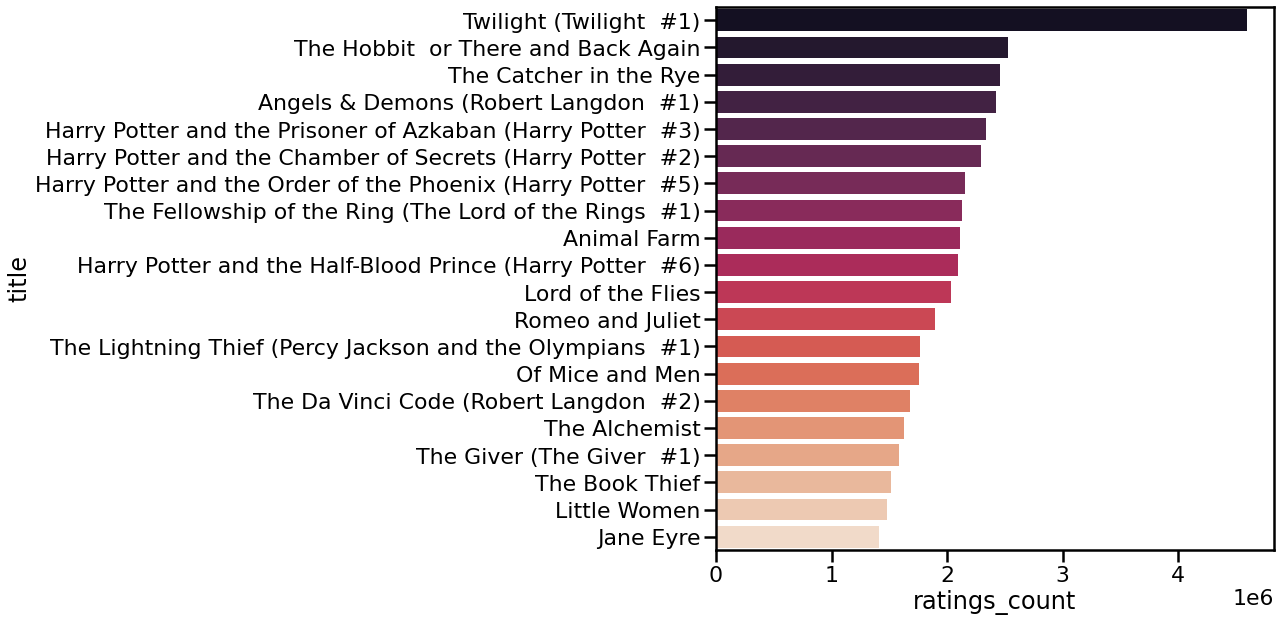

In [6]:
plt.figure(figsize=(10,10))
sns.barplot(most_rating['ratings_count'], most_rating.index, palette='rocket')

**Authors with most written book**

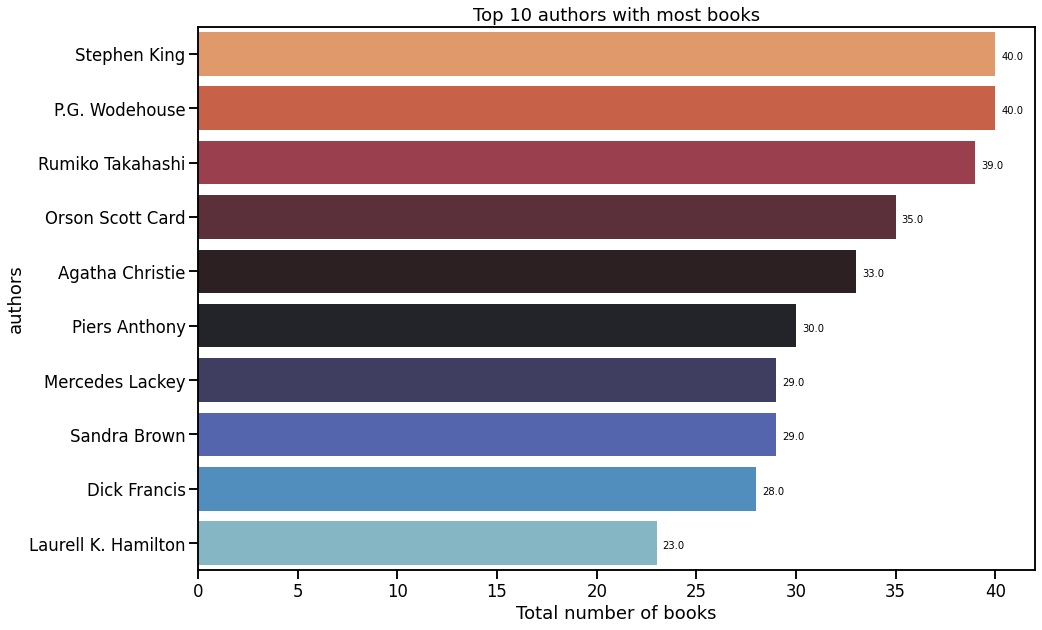

In [7]:
sns.set_context('talk')

most_books = df.groupby('authors')['title'].count().reset_index().sort_values('title', ascending=False).head(10).set_index('authors')

plt.figure(figsize=(15,10))
ax = sns.barplot(most_books['title'], most_books.index, palette='icefire_r')
ax.set_title("Top 10 authors with most books")
ax.set_xlabel("Total number of books")
for i in ax.patches:
    ax.text(i.get_width()+.3, i.get_y()+0.5, str(round(i.get_width())), fontsize = 10, color = 'k')


**Stephen King has most ammount books**

## **Relation between rating and votes**

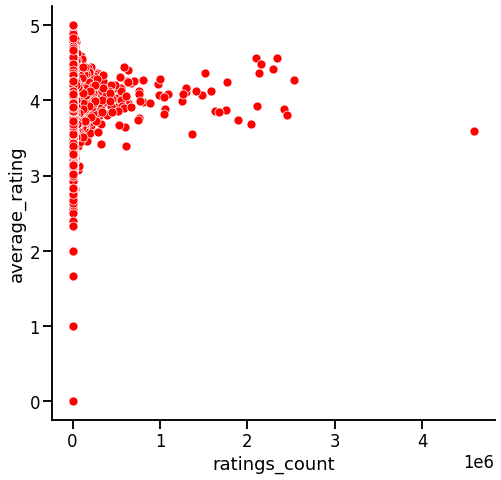

In [8]:
ax = sns.relplot(data=df, x="ratings_count", y="average_rating", color = 'red', sizes=(100, 100), height=7, marker='o')


From the graph above, Majority of the ratings lie near 3.7-4.3, approximately.

Books having scores near 5 are extremely rare. When the rating count is high,the average rating of book is generally high >3.6

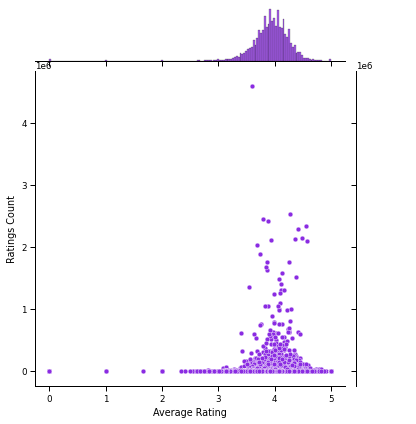

In [9]:
# Dive more into this relation as it is a potential relationship

sns.set_context('paper')
plots = sns.jointplot(x="average_rating", y="ratings_count", data = df, color = 'blueviolet')
plots.set_axis_labels("Average Rating", "Ratings Count")

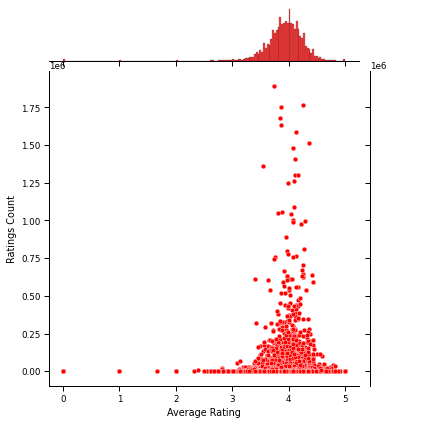

In [10]:
# There seem to be some outliers present in this. For a better outlook, let's consider the count around 2000000 ratings
trial = df[~(df.ratings_count>2000000)]

sns.set_context('paper')
plots = sns.jointplot(x="average_rating", y="ratings_count", data = trial, color = 'red')
plots.set_axis_labels("Average Rating", "Ratings Count")

From the graph, as the number of ratings increase, the rating for the book seems to taper towards 4. The average rating seems to become sparse while the number keeps on decreasing.

### **Relation between pages and rating**

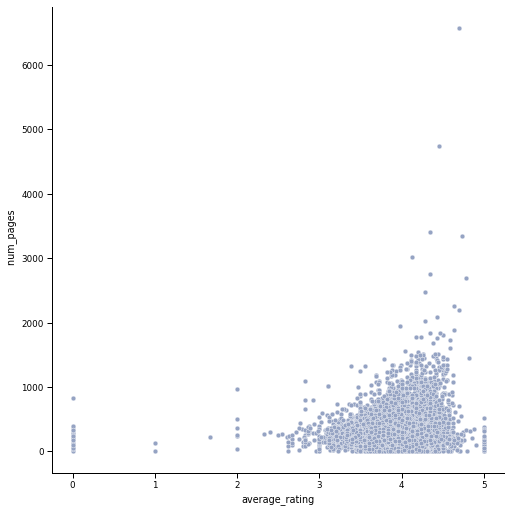

In [11]:
ax = sns.relplot(data=df, x="average_rating", y="  num_pages", color = '#95a3c3', sizes=(100, 200), height=7, marker='o')


### **Top 10 highly rated authors :**

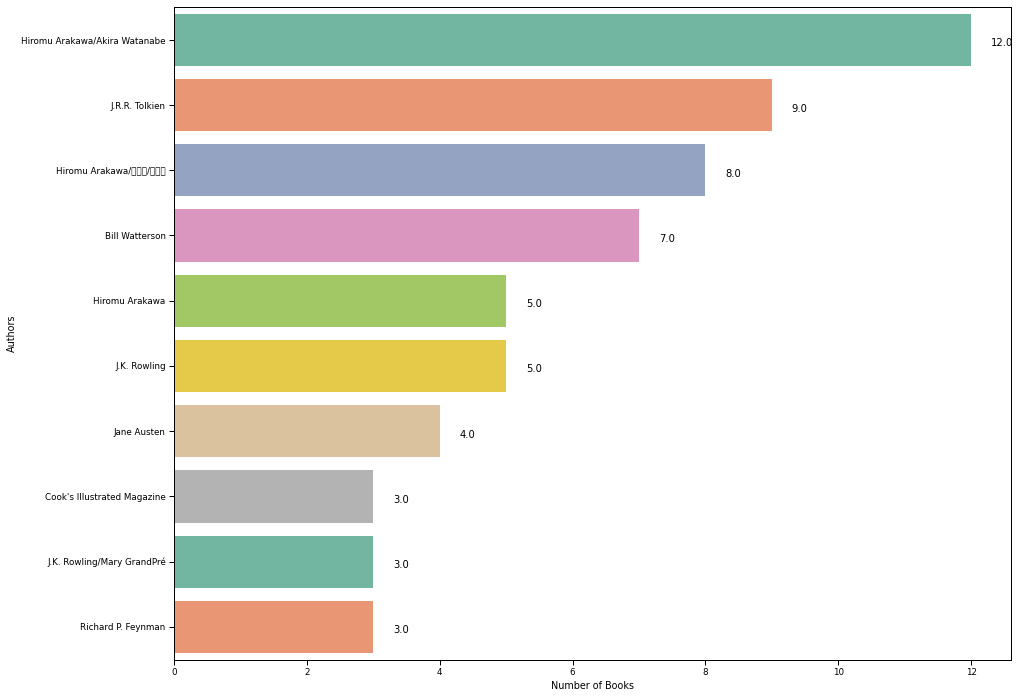

In [12]:
high_rated = df[df['average_rating']>=4.5]

high_rated = high_rated.groupby('authors')['title'].count().reset_index().sort_values('title', ascending = False).head(10).set_index('authors')

plt.figure(figsize=(15,12))
plots = sns.barplot(high_rated['title'], high_rated.index, palette='Set2')
plots.set_xlabel("Number of Books")
plots.set_ylabel("Authors")
for i in plots.patches:
    plots.text(i.get_width()+.3, i.get_y()+0.5, str(round(i.get_width())), fontsize = 10, color = 'k')

### **K-Means Clustering**
The goal is to find the custering in the data

In [13]:
trial = df[['average_rating','ratings_count']]
trial.head()

,average_rating,ratings_count
0,4.57,2095690
1,4.49,2153167
2,4.42,6333
3,4.56,2339585
4,4.78,41428


In [14]:
data = np.asarray([np.asarray(trial['average_rating']), np.asarray(trial['ratings_count'])]).T

Using Elbow method to find best value of 'k'

In [15]:
from scipy.cluster.vq import kmeans, vq
from sklearn.cluster import KMeans
X = data
distortion =[]
for k in range(2,30):
    k_means = KMeans(n_clusters = k)
    k_means.fit(X)
    distortion.append(k_means.inertia_)



Text(0.5, 1.0, 'Elbow Curve')

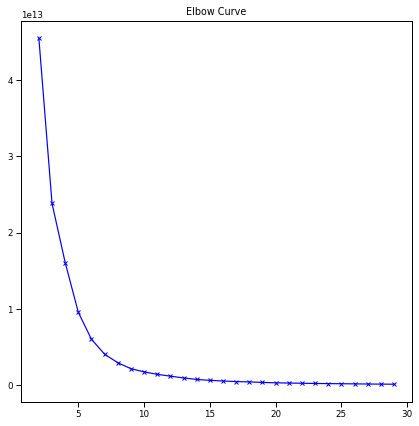

In [16]:
elbow= plt.figure(figsize=(7,7))
plt.plot(range(2,30),distortion,'bx-')
plt.title("Elbow Curve")



**K=5**

KMeans with optimization : Finding the outliers and remove them

In [17]:
# dataframe.idxmax() function returns index of first occurrence of maximum over requested axis.Null values are avoided

trial.idxmax()

average_rating      624
ratings_count     10336
dtype: int64

In [18]:
trial.drop(634, inplace = True)
trial.drop(10336, inplace = True)

In [19]:
data = np.asarray([np.asarray(trial['average_rating']), np.asarray(trial['ratings_count'])]).T

In [20]:
centroids, _ = kmeans(data, 5)
idx, _ = vq(data, centroids) # Assing each sample a cluster

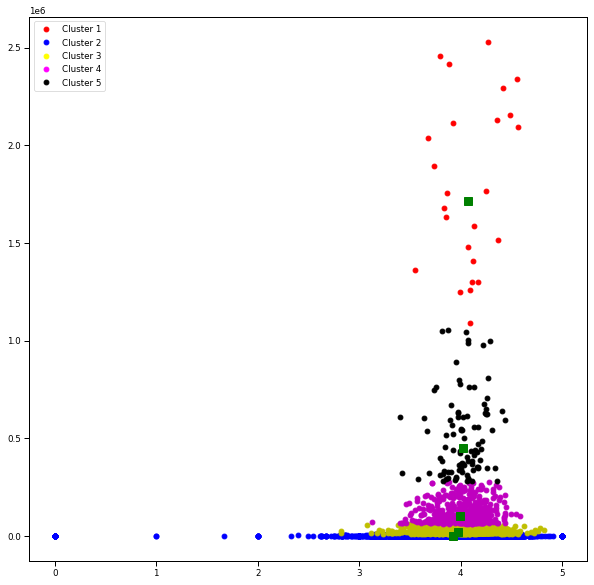

In [21]:
from matplotlib.lines import Line2D
import matplotlib.colors as mcolors
sns.set_context('paper')
plt.figure(figsize=(10,10))

plt.plot(data[idx==0,0],data[idx==0,1],'or',#red circles
     data[idx==1,0],data[idx==1,1],'ob',#blue circles
     data[idx==2,0],data[idx==2,1],'oy', #yellow circles
     data[idx==3,0],data[idx==3,1],'om', #magenta circles
     data[idx==4,0],data[idx==4,1],'ok',#black circles
      )

plt.plot(centroids[:,0],centroids[:,1],'sg',markersize=8, )
circle1 = Line2D(range(1), range(1), color = 'red', linewidth = 0, marker= 'o', markerfacecolor='red')
circle2 = Line2D(range(1), range(1), color = 'blue', linewidth = 0,marker= 'o', markerfacecolor='blue')
circle3 = Line2D(range(1), range(1), color = 'yellow',linewidth=0,  marker= 'o', markerfacecolor='yellow')
circle4 = Line2D(range(1), range(1), color = 'magenta', linewidth=0,marker= 'o', markerfacecolor='magenta')
circle5 = Line2D(range(1), range(1), color = 'black', linewidth = 0,marker= 'o', markerfacecolor='black')

plt.legend((circle1, circle2, circle3, circle4, circle5)
           , ('Cluster 1','Cluster 2', 'Cluster 3', 'Cluster 4', 'Cluster 5'), numpoints = 1, loc = 0, )


plt.show()

### **Conclusion from above Graph :**
1. The green squares are the centroids of clusters
2. The data can be classified into clusters
3. As the rating count seems to decrease, the average rating seems to become sparser, with higher volatility and less accuracy.

## **Reccomandation Engine**
The recommendation system works with the algortihm of K Nearest Neighbors.

Goal : if I ask recommendations for "Romeo and Juliet", five books related to it would appear.

In [22]:
def segregation(data):
    values = []
    for val in data.average_rating:
        if val>=0 and val<=1:
            values.append("Between 0 and 1")
        elif val>1 and val<=2:
            values.append("Between 1 and 2")
        elif val>2 and val<=3:
            values.append("Between 2 and 3")
        elif val>3 and val<=4:
            values.append("Between 3 and 4")
        elif val>4 and val<=5:
            values.append("Between 4 and 5")
        else:
            values.append("NaN")
    print(len(values))
    return values

In [23]:
df['Ratings_Dist'] = segregation(df)
df.head()

11123


,bookID,title,authors,average_rating,isbn,isbn13,language_code,num_pages,ratings_count,text_reviews_count,publication_date,publisher,Ratings_Dist
0,1,Harry Potter and the Half-Blood Prince (Harry ...,J.K. Rowling/Mary GrandPré,4.57,0439785960,9780439785969,eng,652,2095690,27591,9/16/2006,Scholastic Inc.,Between 4 and 5
1,2,Harry Potter and the Order of the Phoenix (Har...,J.K. Rowling/Mary GrandPré,4.49,0439358078,9780439358071,eng,870,2153167,29221,9/1/2004,Scholastic Inc.,Between 4 and 5
2,4,Harry Potter and the Chamber of Secrets (Harry...,J.K. Rowling,4.42,0439554896,9780439554893,eng,352,6333,244,11/1/2003,Scholastic,Between 4 and 5
3,5,Harry Potter and the Prisoner of Azkaban (Harr...,J.K. Rowling/Mary GrandPré,4.56,043965548X,9780439655484,eng,435,2339585,36325,5/1/2004,Scholastic Inc.,Between 4 and 5
4,8,Harry Potter Boxed Set Books 1-5 (Harry Potte...,J.K. Rowling/Mary GrandPré,4.78,0439682584,9780439682589,eng,2690,41428,164,9/13/2004,Scholastic,Between 4 and 5


In [24]:
books_features = pd.concat([df['Ratings_Dist'].str.get_dummies(sep=","), df['average_rating'], df['ratings_count']], axis=1)
books_features.head()

,Between 0 and 1,Between 1 and 2,Between 2 and 3,Between 3 and 4,Between 4 and 5,average_rating,ratings_count
0,0,0,0,0,1,4.57,2095690
1,0,0,0,0,1,4.49,2153167
2,0,0,0,0,1,4.42,6333
3,0,0,0,0,1,4.56,2339585
4,0,0,0,0,1,4.78,41428


In [25]:
from sklearn import neighbors
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

min_max_scaler = MinMaxScaler()
books_features = min_max_scaler.fit_transform(books_features)

model = neighbors.NearestNeighbors(n_neighbors=6, algorithm='ball_tree')
model.fit(books_features)
distance, indices = model.kneighbors(books_features)

In [26]:
def get_index_from_name(name):
    return df[df["title"]==name].index.tolist()[0]

all_books_names = list(df.title.values)

def get_id_from_partial_name(partial):
    for name in all_books_names:
        if partial in name:
            print(name,all_books_names.index(name))
            
def print_similar_books(query=None,id=None):
    if id:
        for id in indices[id][1:]:
            print(df.iloc[id]["title"])
    if query:
        found_id = get_index_from_name(query)
        for id in indices[found_id][1:]:
            print(df.iloc[id]["title"])

In [27]:
print_similar_books("The Catcher in the Rye")

Angels & Demons (Robert Langdon  #1)
Animal Farm
Lord of the Flies
Romeo and Juliet
Of Mice and Men


In [28]:
get_id_from_partial_name("Harry Potter and the ")

Harry Potter and the Half-Blood Prince (Harry Potter  #6) 0
Harry Potter and the Order of the Phoenix (Harry Potter  #5) 1
Harry Potter and the Chamber of Secrets (Harry Potter  #2) 2
Harry Potter and the Prisoner of Azkaban (Harry Potter  #3) 3
Harry Potter and the Half-Blood Prince (Harry Potter  #6) 0
Harry Potter and the Prisoner of Azkaban (Harry Potter  #3) 3
Harry Potter and the Chamber of Secrets (Harry Potter  #2) 2
Harry Potter and the Sorcerer's Stone (Harry Potter  #1) 8873
Harry Potter and the Philosopher's Stone (Harry Potter  #1) 10674
Harry Potter and the Goblet of Fire (Harry Potter  #4) 10675
